# Preprocessing

On this notebook, i will make the necessary preprocessing of the variables of interest in order to model the price based on other features.

## Packages loading and table loading

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression


In [3]:
#table loading

list_df = pd.read_csv('../raw_data/mexico/clean_listing.csv')

list_df.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,35797,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,4123,1,0,2021-12-19,1.45399,1,363,0
1,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,15000,1,50,2021-08-23,0.41000,10,344,1
2,56074,Great space in historical San Rafael,265650,Maris,Cuauhtémoc,19.43977,-99.15605,Entire home/apt,600,2,66,2021-11-21,0.50000,2,364,10


## Scaling the data

### Looking at the data distribution
Now, to understand the distribution of our data, and eventually which selecting the adequate scaler, i will plot an histogram for every numerical column.

Text(0.5, 1.0, 'num_rev_ltm')

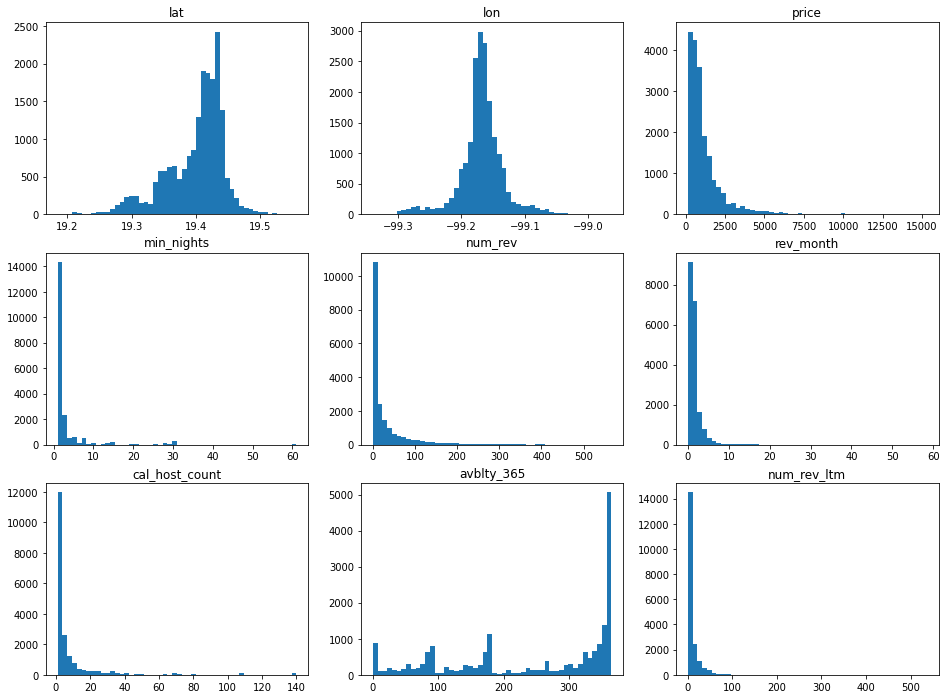

In [4]:
fig, axs = plt.subplots(3,3, figsize=(16,12))

axs[0,0].hist(list_df[['latitude']], bins=50)
axs[0,0].set_title('lat')
axs[0,1].hist(list_df[['longitude']], bins=50)
axs[0,1].set_title('lon')
axs[0,2].hist(list_df[['price']], bins=50)
axs[0,2].set_title('price')

axs[1,0].hist(list_df[['minimum_nights']], bins=50)
axs[1,0].set_title('min_nights')
axs[1,1].hist(list_df[['number_of_reviews']], bins=50)
axs[1,1].set_title('num_rev')
axs[1,2].hist(list_df[['reviews_per_month']], bins=50)
axs[1,2].set_title('rev_month')

axs[2,0].hist(list_df[['calculated_host_listings_count']], bins=50)
axs[2,0].set_title('cal_host_count')
axs[2,1].hist(list_df[['availability_365']], bins=50)
axs[2,1].set_title('avblty_365')
axs[2,2].hist(list_df[['number_of_reviews_ltm']], bins=50)
axs[2,2].set_title('num_rev_ltm')

We can see that latitude, longitude, price, number of reviews and reviews per month follow what's seems to be a normal distribution. Where variables such as min nights, availability and have a different pattern. 

This will help to determine whether a standard scalers or a min max scaler, robust scaler should be used.

First i will copy the dataframe so i can modify it confindently

In [26]:
#i select the variables that are less redundant and might be importat for predicting the price
proc_df = list_df.filter(items=['id', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'price'])

In [27]:
proc_df.head(3)

,id,host_id,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,price
0,35797,153786,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,1,0,4123
1,44616,196253,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,1,50,15000
2,56074,265650,Cuauhtémoc,19.43977,-99.15605,Entire home/apt,2,66,600


In [28]:
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
r_scaler = RobustScaler()

#For latitude, longitude and price i will use standardscaler

proc_df['latitude'] = std_scaler.fit_transform(proc_df[['latitude']])
proc_df['longitude'] = std_scaler.fit_transform(proc_df[['longitude']])
proc_df['price'] = std_scaler.fit_transform(proc_df[['price']])

#For minimum nights and number of reviews

proc_df['minimum_nights'] = mm_scaler.fit_transform(proc_df[['minimum_nights']])
proc_df['number_of_reviews'] = mm_scaler.fit_transform(proc_df[['number_of_reviews']])




In [29]:
proc_df.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,price
0,35797,153786,Cuajimalpa de Morelos,-0.359251,-2.901123,Entire home/apt,0.000000,0.000000,2.089663
1,44616,196253,Cuauhtémoc,0.265388,-0.276450,Entire home/apt,0.000000,0.088339,9.937050
2,56074,265650,Cuauhtémoc,0.876142,0.335805,Entire home/apt,0.016667,0.116608,-0.452062
3,61792,299558,Cuauhtémoc,0.248248,-0.350011,Private room,0.016667,0.093640,0.007512
4,67703,334451,Cuauhtémoc,0.263219,-0.014375,Entire home/apt,0.050000,0.068905,0.528410


## Encoding the categorical features

In [31]:
encoder = OneHotEncoder(sparse=False)

proc_df['neighbourhood'] = encoder.fit_transform(proc_df[['neighbourhood']])
proc_df['room_type'] = encoder.fit_transform(proc_df[['room_type']])

In [32]:
proc_df.head(3)

,id,host_id,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,price
0,35797,153786,0.0,-0.359251,-2.901123,1.0,0.000000,0.000000,2.089663
1,44616,196253,0.0,0.265388,-0.276450,1.0,0.000000,0.088339,9.937050
2,56074,265650,0.0,0.876142,0.335805,1.0,0.016667,0.116608,-0.452062


Now the dable is preprocessed, it still has the id and host id fields in order to match it back if necessary, but identification fields are not necessary in order to perform the models and will be drop when declaring X and y